In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
df = pd.read_csv('Du_lieu_nguoi_di_lam_raw_codes.csv')


In [80]:
df.info()
print(df.head())
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Columns: 155 entries, Timestamp to Q12_Rate15
dtypes: float64(25), int64(99), object(31)
memory usage: 922.9+ KB
     Timestamp Part1_GENERALINFORMATION    Tong12  \
0  13940166360                      NaN  4.400000   
1  13940430682                      NaN  4.600000   
2  13940451219                      NaN  3.800000   
3  13940451739                      NaN  2.266667   
4  13940451860                      NaN  3.533333   

                                     P1Q1_LoSeSchool  P1Q2_TypeSchool  \
0                                      THCS Cộng Hoà                0   
1  THCS Chuyên Hoài Đức (nay là THCS Nguyễn Văn H...                0   
2                         Trường THPT Võ Thành Trinh                0   
3               THCS Trần Huy Liệu- Vụ Bản- Nam Định                0   
4                                          hải hậu c                0   

   P1Q3_TypeClass                 P1Q4_Hometown  P1Q5_Gen

Index(['Timestamp', 'Part1_GENERALINFORMATION', 'Tong12', 'P1Q1_LoSeSchool',
       'P1Q2_TypeSchool', 'P1Q3_TypeClass', 'P1Q4_Hometown', 'P1Q5_Gender',
       'P1Q6_Ethn', 'V9',
       ...
       'Q12_Rate6', 'Q12_Rate7', 'Q12_Rate8', 'Q12_Rate9', 'Q12_Rate10',
       'Q12_Rate11', 'Q12_Rate12', 'Q12_Rate13', 'Q12_Rate14', 'Q12_Rate15'],
      dtype='object', length=155)

In [81]:
# Drop columns with more than 80% missing values
threshold = 0.8  # 80%
missing_frac = df.isna().mean() 
cols_to_drop = missing_frac[missing_frac > threshold].index.tolist()
print(f'Columns to drop ({len(cols_to_drop)}):', cols_to_drop)
df = df.drop(columns=cols_to_drop)


Columns to drop (9): ['Part1_GENERALINFORMATION', 'P1Q10a_Reasons_ChanJob', 'P1Q10a_Reasons_ChanJob_Note', 'P1Q11a_DifOc', 'P1Q13_Mjob_Note', 'Q1b_Otherjob', 'Q3_WhereOth', 'Q4_Act11Nam', 'Q5_AffectOth']


In [82]:
df = df.drop(columns=['P1Q1_LoSeSchool', 'P1Q4_Hometown','P1Q10a_Reason_ChanJob','P1Q12_Fjob_Note','Timestamp'])


In [83]:
for col in df.columns:
    null_count = df[col].isna().sum()
    if null_count > 0:
        print(f"{col}: {null_count} null")

Q1a_NamTrainjob: 363 null
Q1c_Cer: 506 null
Q1d_ReCurjob: 468 null
Q1e_LifeUse: 472 null
Q5_Affect2: 2 null
Q5_Affect3: 1 null
Q5_Affect4: 3 null
Q5_Affect5: 3 null
Q5_Affect6: 2 null
Q5_Affect7: 2 null
Q5_Affect8: 2 null
Q5_Affect9: 2 null
Q5_Affect10: 2 null
Q5_Affect11: 1 null
Q5_Affect12: 2 null
Q5_Affect13: 1 null
Q5_Affect14: 1 null
Q5_Affect15: 1 null
Q5_Affect16: 2 null
Q5_Affect17: 1 null
Q5_Affect18: 1 null
Q5_Affect19: 1 null
Q5_Affect20: 2 null
Q5_Affect21: 3 null


In [84]:
df['Q1_Trainjob'].value_counts()


Q1_Trainjob
1    627
2    135
Name: count, dtype: int64

In [85]:
df['Q1a_NamTrainjob'].value_counts()


Q1a_NamTrainjob
1.0    335
0.0     28
5.0      9
2.0      9
6.0      6
3.0      6
4.0      6
Name: count, dtype: int64

In [86]:
df.to_csv('Du_lieu_nguoi_di_lam_crop.csv', index=False)


In [87]:
df = pd.read_csv('Du_lieu_nguoi_di_lam_crop.csv')


In [88]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Columns: 141 entries, Tong12 to Q12_Rate15
dtypes: float64(25), int64(98), object(18)
memory usage: 839.5+ KB


In [89]:
# Lấy danh sách tất cả cột object
object_cols = df.select_dtypes(include="object").columns

# Duyệt từng cột và chuẩn hóa chuỗi
for col in object_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()

In [90]:
df.columns = df.columns.str.lower()

In [91]:
# Danh sách các cột cần gán -2 nếu không được hướng nghiệp
cols_q1 = ['q1a_namtrainjob', 'q1c_cer', 'q1d_recurjob', 'q1e_lifeuse']

# Điều kiện: q1_trainjob == 2  → không được hướng nghiệp
mask = df['q1_trainjob'] == 2

# Gán -2 cho các cột trên
df.loc[mask, cols_q1] = -2

In [92]:
cols = ['q1a_namtrainjob', 'q1c_cer', 'q1d_recurjob', 'q1e_lifeuse']

df[['q1_trainjob'] + cols].groupby('q1_trainjob').apply(lambda x: x.isna().sum())



C:\Users\Admin\AppData\Local\Temp\ipykernel_29556\3493881174.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df[['q1_trainjob'] + cols].groupby('q1_trainjob').apply(lambda x: x.isna().sum())


,q1_trainjob,q1a_namtrainjob,q1c_cer,q1d_recurjob,q1e_lifeuse
q1_trainjob,,,,,
1,0,260,408,393,393
2,0,0,0,0,0


In [93]:
df.loc[:, cols] = df.loc[:, cols].fillna(-1) # Gán -1 cho các giá trị null trong các cột này, ý nghĩa là quên hoặc không trả lời


In [94]:
df.dropna(inplace=True)

In [95]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count} null")

In [96]:
# 1) Nhóm nghề
groups = {
    "Nhóm kỹ thuật": "kt",
    "Nhóm nghiên cứu": "nc",
    "Nhóm nghệ thuật": "nt",
    "Nhóm xã hội": "xh",
    "Nhóm quản lý": "ql",
    "Nhóm nghiệp vụ": "nv",
}

# 2) DataFrame nhị phân rỗng
bin_df = pd.DataFrame()

# 3) Chỉ lấy các cột bắt đầu bằng 'Q7_Requi'
skill_cols = [c for c in df.columns if c.startswith("q7_requi")]

for col in skill_cols:
    skill_name = col.replace("q7_", "").lower()   # ví dụ: requi1_kheo_leo
    
    # ép dữ liệu cột này thành string, thay NaN bằng ""
    col_clean = df[col].fillna("").astype(str)
    
    # 4) Tạo 6 cột nhị phân cho mỗi nhóm nghề
    for g_vn, g_code in groups.items():
        new_col = f"{skill_name}_{g_code}"
        # dùng str.contains thay cho lambda để tránh lỗi float
        bin_df[new_col] = col_clean.str.contains(g_vn).astype(int)

# 5) Gộp lại
df_final = pd.concat([df, bin_df], axis=1)

df_final.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_29556\848187981.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bin_df[new_col] = col_clean.str.contains(g_vn).astype(int)
C:\Users\Admin\AppData\Local\Temp\ipykernel_29556\848187981.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bin_df[new_col] = col_clean.str.contains(g_vn).astype(int)
C:\Users\Admin\AppData\Local\Temp\ipykernel_29556\848187981.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

,tong12,p1q2_typeschool,p1q3_typeclass,p1q5_gender,p1q6_ethn,v9,p1q8_afloseschool,p1q8a_job_afloseschool,p1q9_job_current,p1q10_chanjob,...,requi17_lam_viec_voi_ho_so_du_lieu_nt,requi17_lam_viec_voi_ho_so_du_lieu_xh,requi17_lam_viec_voi_ho_so_du_lieu_ql,requi17_lam_viec_voi_ho_so_du_lieu_nv,requi18_lam_viec_ti_mi_chi_tiet_kt,requi18_lam_viec_ti_mi_chi_tiet_nc,requi18_lam_viec_ti_mi_chi_tiet_nt,requi18_lam_viec_ti_mi_chi_tiet_xh,requi18_lam_viec_ti_mi_chi_tiet_ql,requi18_lam_viec_ti_mi_chi_tiet_nv
0,4.400000,0,0,0,0,36,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
1,4.600000,0,1,0,0,43,0,0,4,1,...,0,0,0,0,0,0,0,0,0,0
2,3.800000,0,0,1,0,35,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2.266667,0,1,0,0,43,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.533333,0,1,0,0,39,0,2,2,1,...,0,0,0,0,0,0,0,0,0,0


In [97]:
bin_df.head


<bound method NDFrame.head of      requi1_kheo_leo_kt  requi1_kheo_leo_nc  requi1_kheo_leo_nt  \
0                     0                   0                   0   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                   0                   0   
4                     0                   0                   0   
..                  ...                 ...                 ...   
757                   0                   0                   0   
758                   0                   0                   0   
759                   0                   0                   0   
760                   0                   0                   0   
761                   0                   0                   0   

     requi1_kheo_leo_xh  requi1_kheo_leo_ql  requi1_kheo_leo_nv  \
0                     0                   0                   0   
1                     0        

In [98]:
# 1. Map tên nhóm nghề (đúng y như trong cột q7_requi*, có dấu & chữ thường)
groups = {
    "nhóm kỹ thuật": "kt",
    "nhóm nghiên cứu": "nc",
    "nhóm nghệ thuật": "nt",
    "nhóm xã hội": "xh",
    "nhóm quản lý": "ql",
    "nhóm nghiệp vụ": "nv",
}

# 2. Lấy 18 cột gốc của Câu 7
q7_cols = [c for c in df_final.columns if c.lower().startswith("q7_requi")]
print("Các cột C7 gốc:", q7_cols)

# 3. Từ mỗi cột q7_requi* → fill vào 6 cột nhị phân tương ứng
for col in q7_cols:
    # ví dụ: 'q7_requi1_kheo_leo' -> 'requi1_kheo_leo'
    base = col.lower().replace("q7_", "")

    # chuẩn hóa nội dung về chữ thường, thay NaN bằng chuỗi rỗng
    col_clean = df_final[col].fillna("").str.lower()

    for g_name, g_code in groups.items():
        new_col = f"{base}_{g_code}"   # ví dụ: requi1_kheo_leo_kt
        df_final[new_col] = col_clean.str.contains(g_name).astype(int)

# 4. Kiểm tra nhanh xem dữ liệu đã khác 0 chưa
print(df_final[[c for c in df_final.columns if c.startswith("requi1_kheo_leo")]].sum())
print(df_final[[c for c in df_final.columns if c.startswith("requi2_sang_tao")]].sum())

Các cột C7 gốc: ['q7_requi1_kheo_leo', 'q7_requi2_sang_tao', 'q7_requi3_dinh_huong', 'q7_requi4_nghien_cuu', 'q7_requi5_phan_tich', 'q7_requi6_viet', 'q7_requi7_tuong_tuong', 'q7_requi8_am_nhac', 'q7_requi9_bieu_dien_nghe_thuat', 'q7_requi10_noi', 'q7_requi11_nghe', 'q7_requi12_thuyet_trinh', 'q7_requi13_lam_viec_voi_nguoi_khac', 'q7_requi14_gay_anh_huong', 'q7_requi15_thuyet_phuc', 'q7_requi16_vuot_kho_khan_nguy_hiem', 'q7_requi17_lam_viec_voi_ho_so_du_lieu', 'q7_requi18_lam_viec_ti_mi_chi_tiet']
requi1_kheo_leo_kt    357
requi1_kheo_leo_nc     48
requi1_kheo_leo_nt    378
requi1_kheo_leo_xh    100
requi1_kheo_leo_ql     28
requi1_kheo_leo_nv     44
dtype: int64
requi2_sang_tao_kt    289
requi2_sang_tao_nc    168
requi2_sang_tao_nt    353
requi2_sang_tao_xh    127
requi2_sang_tao_ql     58
requi2_sang_tao_nv     38
dtype: int64


In [99]:
df_final.to_csv('Du_lieu_nguoi_di_lam_final.csv', index=False)

In [100]:
df = pd.read_csv("Du_lieu_nguoi_di_lam_final.csv")


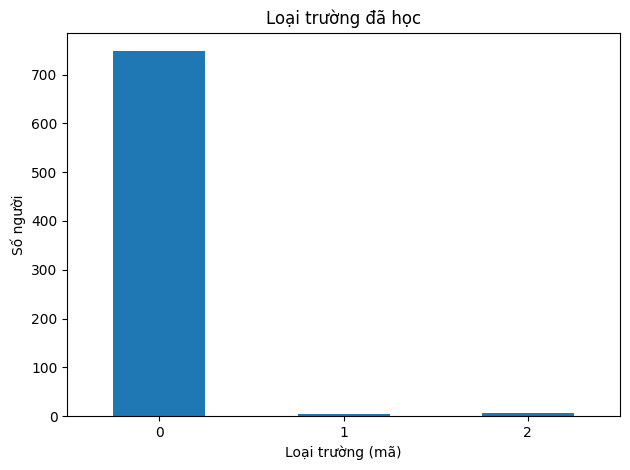

In [101]:
# C. LOẠI TRƯỜNG
plt.figure()
df['p1q2_typeschool'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Loại trường (mã)")
plt.ylabel("Số người")
plt.title("Loại trường đã học")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Hầu hết học trường công lập

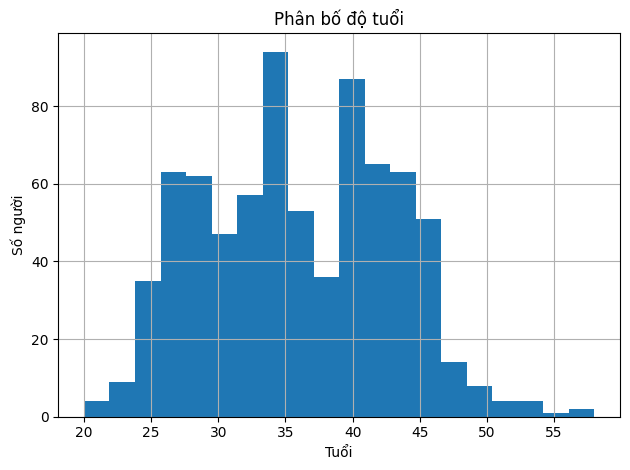

In [102]:
# A. PHÂN BỐ TUỔI
plt.figure()
df['v9'].hist(bins=20)
plt.xlabel("Tuổi")
plt.ylabel("Số người")
plt.title("Phân bố độ tuổi")
plt.tight_layout()
plt.show()

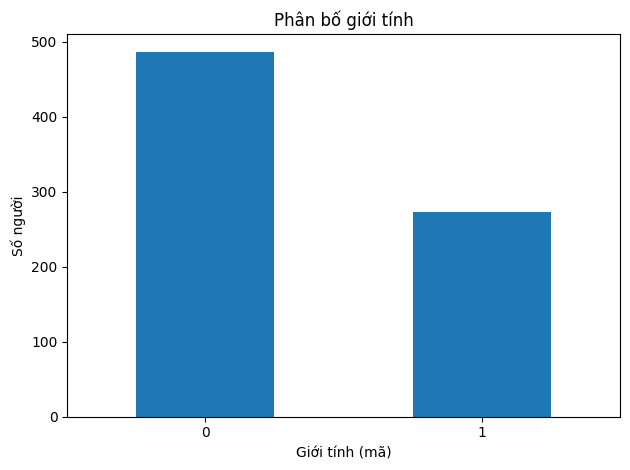

In [103]:
# B. GIỚI TÍNH
plt.figure()
df['p1q5_gender'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Giới tính (mã)")
plt.ylabel("Số người")
plt.title("Phân bố giới tính")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Nam nhiều hơn nữ

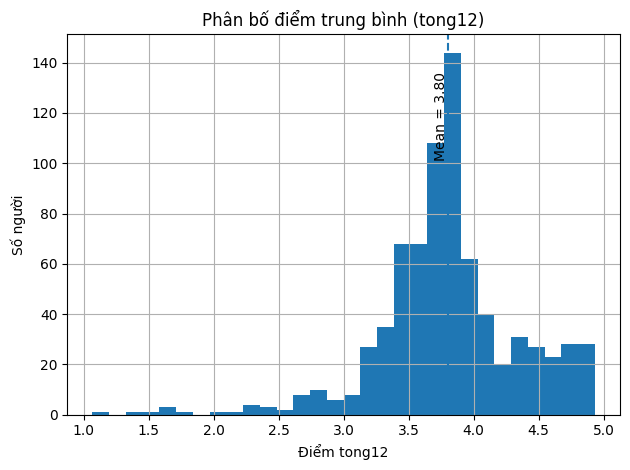

In [ ]:
#  TRUNG BÌNH sự hài lòng sự nghiệp (tong12)
plt.figure()
df['tong12'].hist(bins=30)
plt.xlabel("Điểm tong12")
plt.ylabel("Số người")
plt.title("Phân bố điểm của sự hài lòng sự nghiệp(tong12)")

# vẽ thêm đường thẳng thể hiện giá trị trung bình
mean_tong12 = df['tong12'].mean()
plt.axvline(mean_tong12, linestyle='dashed')
plt.text(mean_tong12, plt.ylim()[1]*0.9, f"Mean = {mean_tong12:.2f}", rotation=90,
         va='top', ha='right')
plt.tight_layout()
plt.show()

# Trung bình khoảng 3.8, có một số người có điểm rất thấp 

Text(0.5, 1.0, 'Sau khi học xong THCS, anh/chị làm gì?')

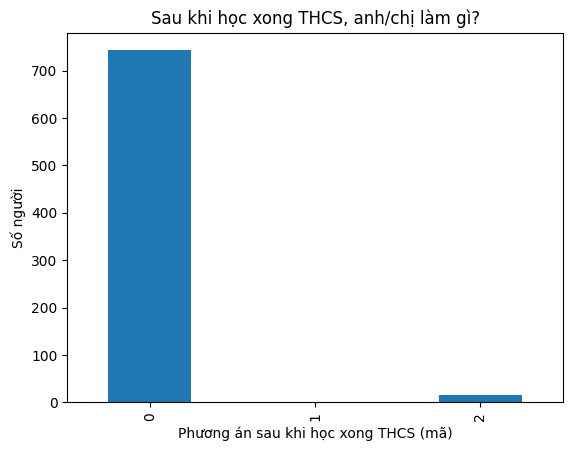

In [105]:
# SAU KHI HỌC XONG THCS THÌ ANH/CHỊ...? (p1q8_afloseschool)
plt.figure()
df['p1q8_afloseschool'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Phương án sau khi học xong THCS (mã)")
plt.ylabel("Số người")
plt.title("Sau khi học xong THCS, anh/chị làm gì?")

# Sau khi học xong THCS thì đa số học tiếp lên THPT, một số ít chọn đi làm 

Text(0.5, 1.0, 'Tình trạng đã từng đổi việc')

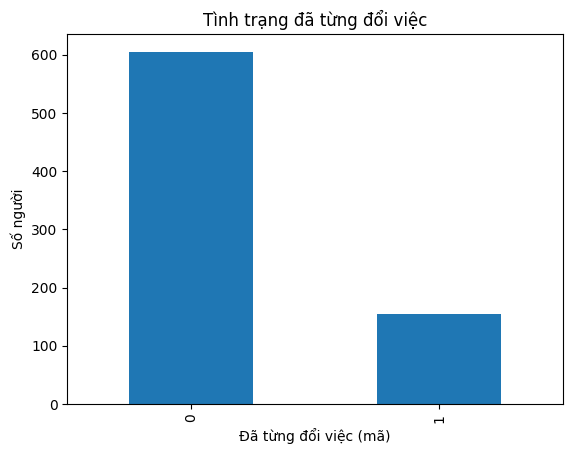

In [106]:
#  ĐÃ TỪNG ĐỔI VIỆC HAY CHƯA (p1q10_chanjob: 0/1)
plt.figure()
df['p1q10_chanjob'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Đã từng đổi việc (mã)")
plt.ylabel("Số người")
plt.title("Tình trạng đã từng đổi việc")

# Số người đã từng đổi việc nhiều hơn số người chưa từng đổi việc. Tình trạng đổi việc khá phổ biến hiện nay.

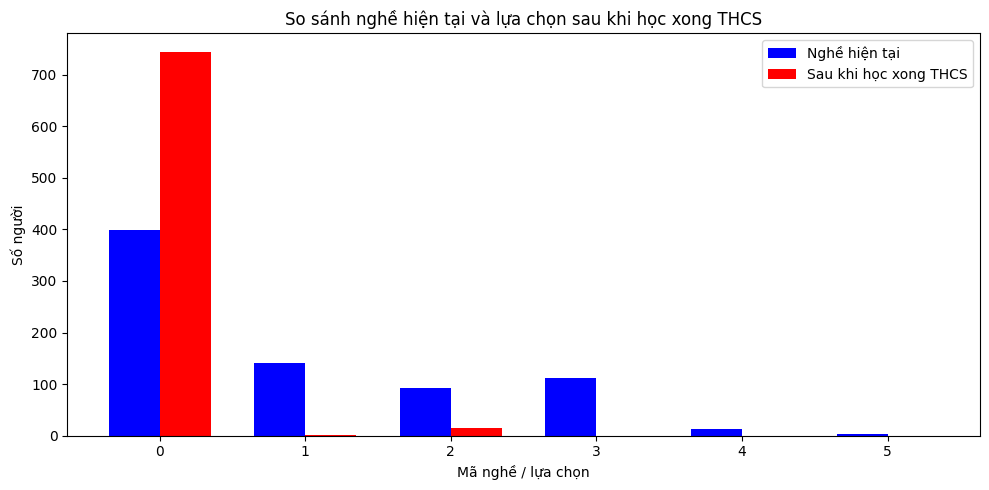

In [107]:
# Đếm tần suất theo mã
current_counts = df["p1q9_job_current"].value_counts().sort_index()
after_counts   = df["p1q8_afloseschool"].value_counts().sort_index()

# Đồng bộ các mã (phòng khi 1 bên thiếu mã nào đó)
all_codes = sorted(set(current_counts.index).union(after_counts.index))
current = current_counts.reindex(all_codes, fill_value=0)
after   = after_counts.reindex(all_codes, fill_value=0)

# Vẽ grouped bar chart
plt.figure(figsize=(10, 5))

bar_width = 0.35
x = range(len(all_codes))

plt.bar(
    [i - bar_width/2 for i in x],
    current,
    width=bar_width,
    color="blue",
    label="Nghề hiện tại",
)
plt.bar(
    [i + bar_width/2 for i in x],
    after,
    width=bar_width,
    color="red",
    label="Sau khi học xong THCS",
)

plt.xticks(list(x), all_codes)
plt.xlabel("Mã nghề / lựa chọn")
plt.ylabel("Số người")
plt.title("So sánh nghề hiện tại và lựa chọn sau khi học xong THCS")
plt.legend()
plt.tight_layout()
plt.show()

# Sau khi học xong THCS, nhiều người chọn nhóm nghành Kĩ thuật, công nghệ. Sau đó đổi nghề, phần bố tương đối hơn giữa các nhóm nghề, nhưng chủ yếu vẫn là nhóm nghành Kĩ thuật, công nghệ.

p1q9_job_current      0     1     2     3    4    5
p1q15_hsub                                         
0                  46.7  29.2   4.8  16.8  2.1  0.3
1                  60.9   9.9  17.9  10.6  0.7  0.0
2                  48.8   6.1  23.2  20.1  1.8  0.0
3                  33.3  35.2  11.1  11.1  7.4  1.9
4                  52.9  29.4   5.9  11.8  0.0  0.0
5                  72.2   5.6  11.1  11.1  0.0  0.0
6                  87.5   0.0  12.5   0.0  0.0  0.0
7                  89.5   0.0   5.3   0.0  0.0  5.3
8                  66.7  33.3   0.0   0.0  0.0  0.0
9                  88.9   0.0  11.1   0.0  0.0  0.0
10                 66.7   0.0   0.0  33.3  0.0  0.0
11                100.0   0.0   0.0   0.0  0.0  0.0
12                100.0   0.0   0.0   0.0  0.0  0.0


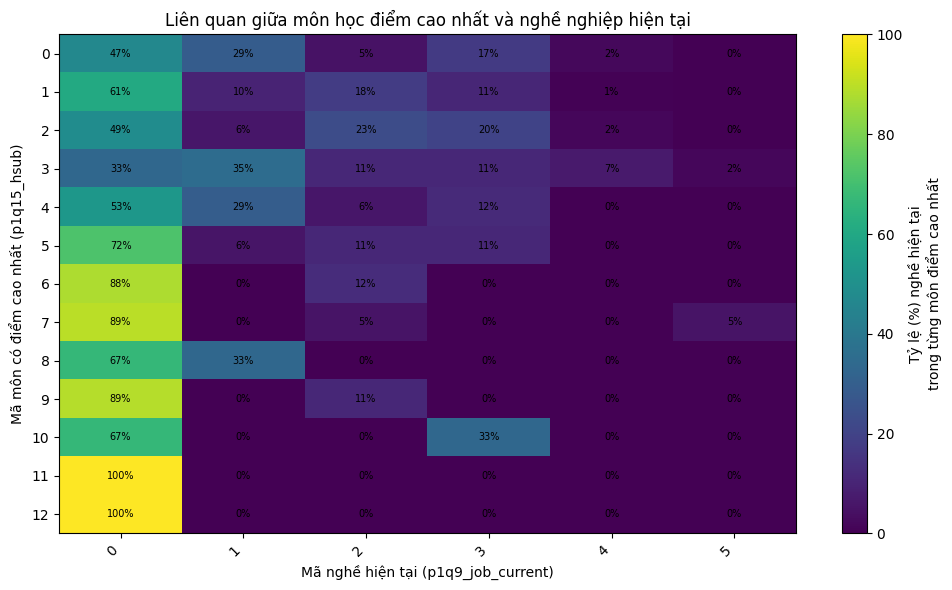

In [108]:
# Bảng chéo: mỗi dòng = 1 môn cao điểm, cột = nghề hiện tại (tính % theo từng môn)
ct = pd.crosstab(df['p1q15_hsub'],
                 df['p1q9_job_current'],
                 normalize='index') * 100

print(ct.round(1))   # xem bảng số
fig, ax = plt.subplots(figsize=(10, 6))

im = ax.imshow(ct.values, aspect='auto')

# Tick & label
ax.set_xticks(range(len(ct.columns)))
ax.set_xticklabels(ct.columns, rotation=45, ha='right')

ax.set_yticks(range(len(ct.index)))
ax.set_yticklabels(ct.index)

# Ghi giá trị %
for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        val = ct.values[i, j]
        ax.text(j, i, f"{val:.0f}%", ha='center', va='center', fontsize=7)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Tỷ lệ (%) nghề hiện tại\ntrong từng môn điểm cao nhất")

ax.set_xlabel("Mã nghề hiện tại (p1q9_job_current)")
ax.set_ylabel("Mã môn có điểm cao nhất (p1q15_hsub)")
ax.set_title("Liên quan giữa môn học điểm cao nhất và nghề nghiệp hiện tại")

plt.tight_layout()
plt.show()


p1q9_job_current      0     1     2     3    4    5
p1q16_likesub                                      
0                  79.3  11.4   4.3   3.6  0.7  0.7
1                  69.9   5.6  14.7   9.1  0.0  0.7
2                  41.8  19.2  18.5  18.5  2.1  0.0
3                  25.7  34.5  10.1  27.7  1.4  0.7
4                  30.6  38.8  10.6  12.9  7.1  0.0
5                  52.2  13.0  17.4  17.4  0.0  0.0
6                  50.0   3.6  14.3  25.0  7.1  0.0
7                  88.9   0.0   5.6   5.6  0.0  0.0
8                  50.0  25.0  25.0   0.0  0.0  0.0
9                  81.8   0.0   9.1   9.1  0.0  0.0
10                 25.0   0.0  50.0  25.0  0.0  0.0
11                100.0   0.0   0.0   0.0  0.0  0.0
12                 85.7   0.0  14.3   0.0  0.0  0.0


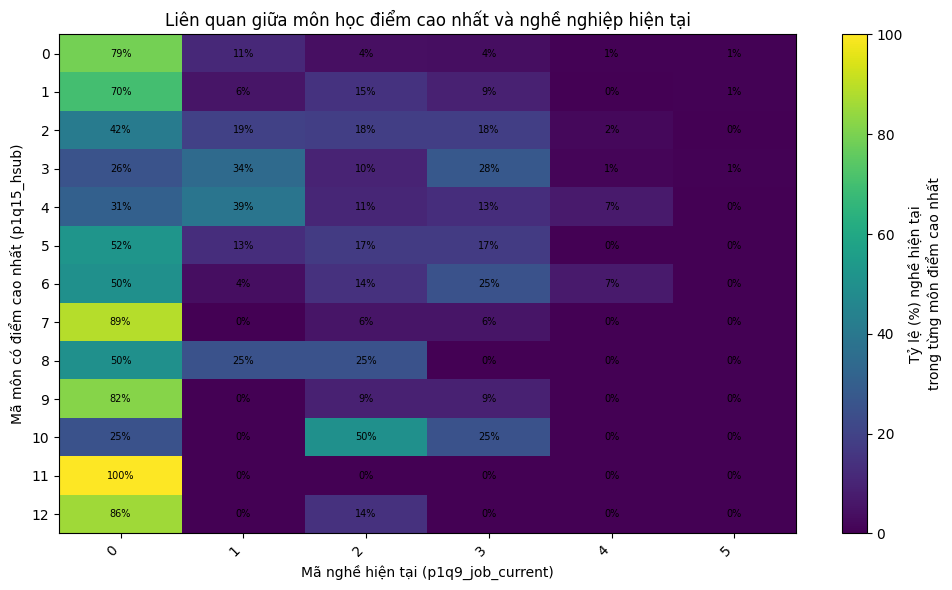

In [109]:
# Bảng chéo: mỗi dòng = 1 môn cao điểm, cột = nghề hiện tại (tính % theo từng môn)
ct = pd.crosstab(df['p1q16_likesub'],
                 df['p1q9_job_current'],
                 normalize='index') * 100

print(ct.round(1))   # xem bảng số
fig, ax = plt.subplots(figsize=(10, 6))

im = ax.imshow(ct.values, aspect='auto')

# Tick & label
ax.set_xticks(range(len(ct.columns)))
ax.set_xticklabels(ct.columns, rotation=45, ha='right')

ax.set_yticks(range(len(ct.index)))
ax.set_yticklabels(ct.index)

# Ghi giá trị %
for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        val = ct.values[i, j]
        ax.text(j, i, f"{val:.0f}%", ha='center', va='center', fontsize=7)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Tỷ lệ (%) nghề hiện tại\ntrong từng môn điểm cao nhất")

ax.set_xlabel("Mã nghề hiện tại (p1q9_job_current)")
ax.set_ylabel("Mã môn có điểm cao nhất (p1q15_hsub)")
ax.set_title("Liên quan giữa môn học điểm cao nhất và nghề nghiệp hiện tại")

plt.tight_layout()
plt.show()


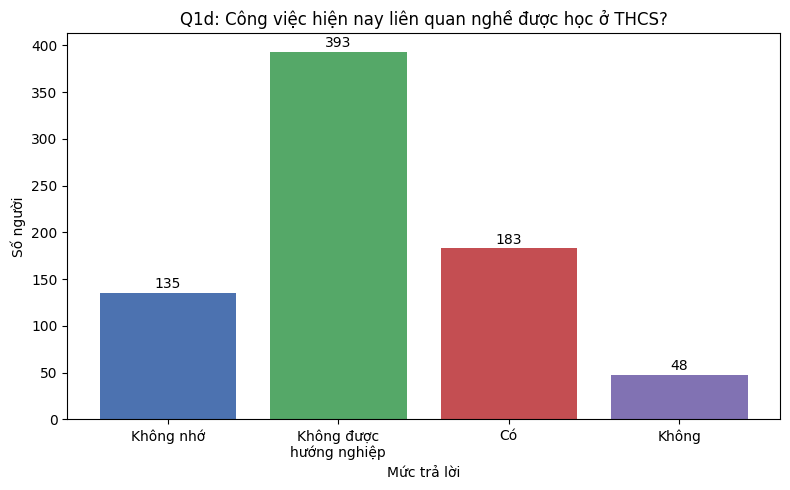

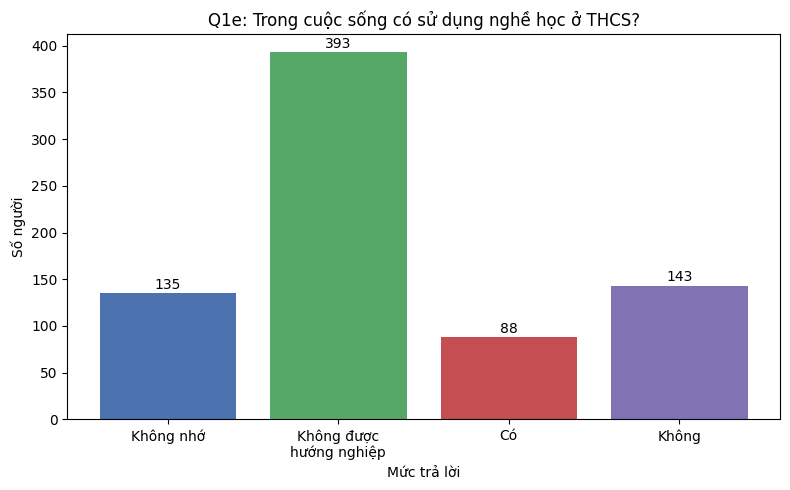

In [110]:
# Mapping ý nghĩa mã
label_map = {
    -1: "Không được\nhướng nghiệp",
    -2: "Không nhớ",
     0: "Có",
     1: "Không"
}

# Danh sách câu hỏi cần trực quan
questions = {
    "q1d_recurjob": "Q1d: Công việc hiện nay liên quan nghề được học ở THCS?",
    "q1e_lifeuse": "Q1e: Trong cuộc sống có sử dụng nghề học ở THCS?"
}

for col, title in questions.items():

    # Lấy tần suất
    counts = df[col].value_counts().sort_index()

    # Đổi mã thành chữ
    counts.index = counts.index.map(label_map)

    # Vẽ bar chart
    plt.figure(figsize=(8,5))
    plt.bar(counts.index, counts.values, color=['#4c72b0','#55a868','#c44e52','#8172b3'])
    
    plt.title(title)
    plt.ylabel("Số người")
    plt.xlabel("Mức trả lời")
    plt.xticks(rotation=0)
    
    # Ghi số lên cột
    for i, v in enumerate(counts.values):
        plt.text(i, v + 5, str(v), ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

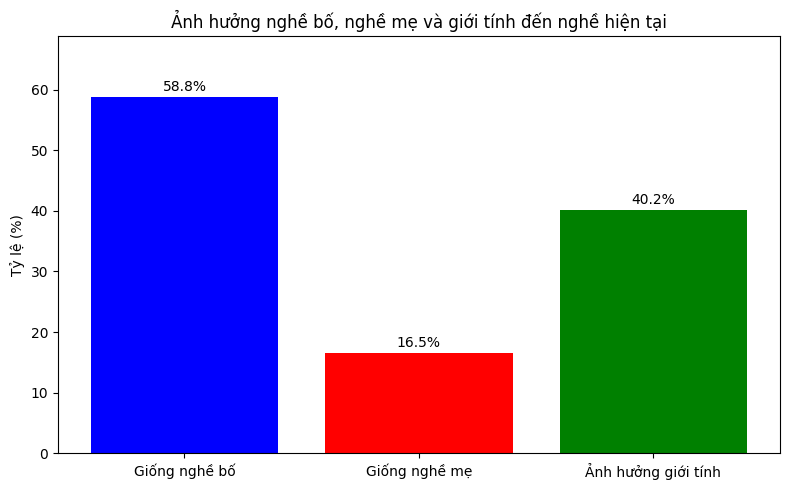

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Du_lieu_nguoi_di_lam_final.csv")

# Tạo biến match nghề bố, mẹ
df['match_father'] = (df['p1q9_job_current'] == df['p1q11_mostsuc']).astype(int)
df['match_mother'] = (df['p1q9_job_current'] == df['p1q12_fjob']).astype(int)

# Tính theo % toàn bộ mẫu
pct_father = df['match_father'].mean() * 100
pct_mother = df['match_mother'].mean() * 100

# Tính theo giới tính
gender_match = df.groupby('p1q5_gender')[['match_father', 'match_mother']].mean() * 100
gender_match
plt.figure(figsize=(8,5))

values = [
    pct_father,
    pct_mother,
    gender_match['match_father'].loc[0] - gender_match['match_mother'].loc[1]  # mức ảnh hưởng theo giới tính
]

labels = ['Giống nghề bố', 'Giống nghề mẹ', 'Ảnh hưởng giới tính']

colors = ['blue', 'red', 'green']

plt.bar(labels, values, color=colors)

plt.ylabel("Tỷ lệ (%)")
plt.title("Ảnh hưởng nghề bố, nghề mẹ và giới tính đến nghề hiện tại")

for i,v in enumerate(values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.ylim(0, max(values)+10)
plt.tight_layout()
plt.show()



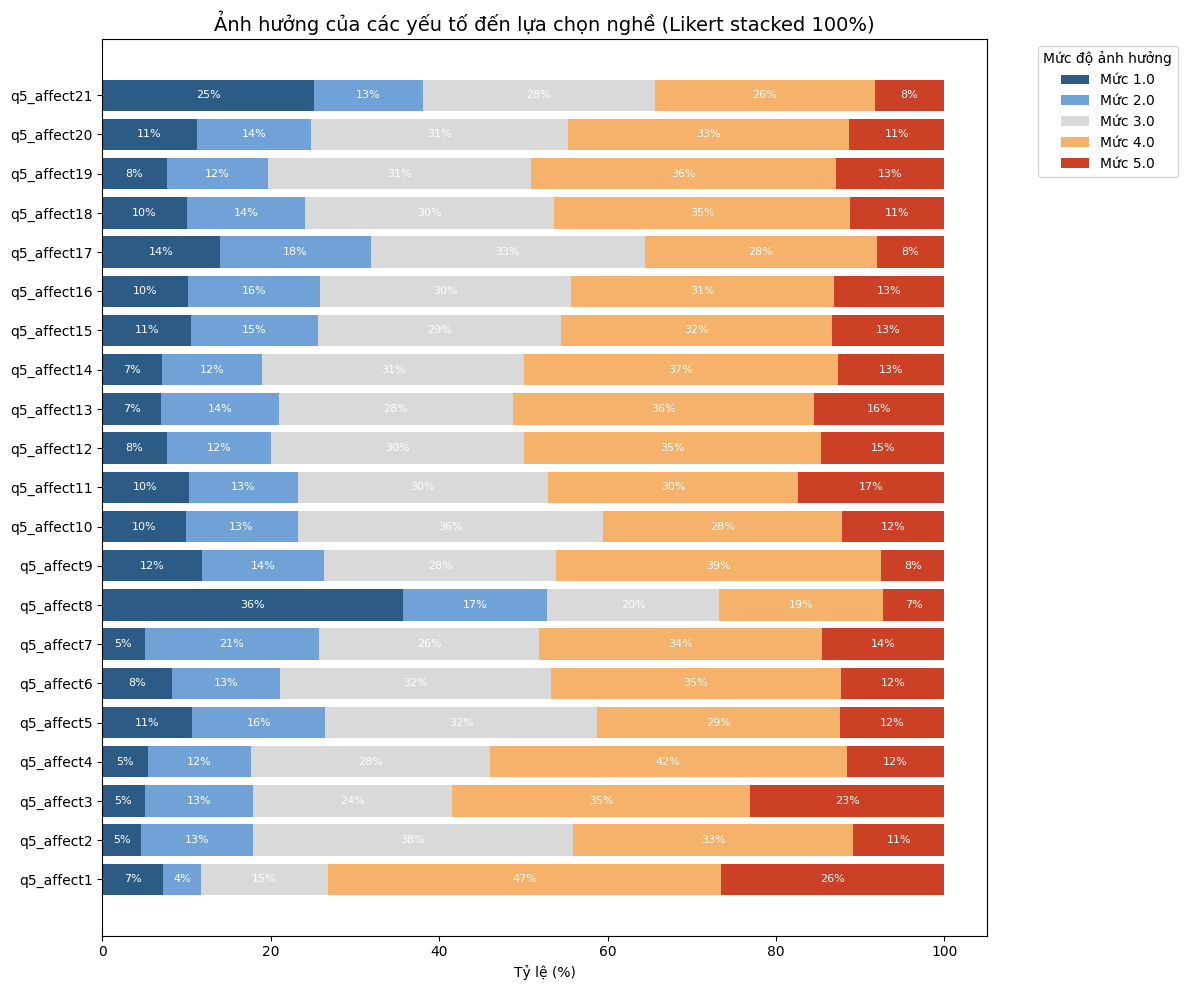

In [112]:
# Các cột effect
effect_cols = [f"q5_affect{i}" for i in range(1, 22)]

# Tạo bảng đếm % từng mức cho mỗi câu
likert = df[effect_cols].apply(lambda x: x.value_counts(normalize=True) * 100).T

# Đảm bảo các mức 1→5 đều có (tránh lỗi thiếu cột)
for i in range(1, 6):
    if i not in likert.columns:
        likert[i] = 0

# Sắp xếp mức theo 1→5
likert = likert[[1, 2, 3, 4, 5]]

# Màu (có thể đổi)
colors = [
    "#2c5c85",   # Mức 1 (rất ảnh hưởng)
    "#70a1d7",   # Mức 2
    "#d9d9d9",   # Mức 3 (trung lập)
    "#f6b26b",   # Mức 4
    "#cc4125"    # Mức 5 (không ảnh hưởng)
]

# Vẽ
fig, ax = plt.subplots(figsize=(12, 10))

left = np.zeros(len(likert))

for i, level in enumerate(likert.columns):
    ax.barh(likert.index, likert[level], left=left, color=colors[i], label=f"Mức {level}")
    
    # Ghi % lên từng đoạn
    for y, (value, l) in enumerate(zip(likert[level], left)):
        if value > 3:   # chỉ ghi nếu đủ rộng
            ax.text(l + value/2, y, f"{value:.0f}%", ha='center', va='center', color="white", fontsize=8)
            
    left += likert[level]

ax.set_xlabel("Tỷ lệ (%)")
ax.set_title("Ảnh hưởng của các yếu tố đến lựa chọn nghề (Likert stacked 100%)", fontsize=14)

plt.legend(title="Mức độ ảnh hưởng", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

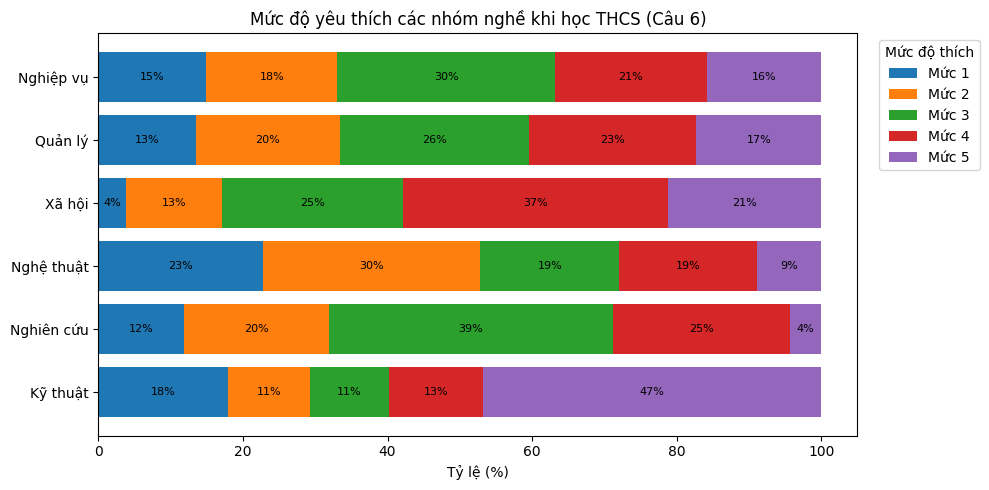

In [113]:


like_cols = {
    "q6_likeen":  "Kỹ thuật",
    "q6_likere":  "Nghiên cứu",
    "q6_likear":  "Nghệ thuật",
    "q6_likeso":  "Xã hội",
    "q6_likeman": "Quản lý",
    "q6_likecle": "Nghiệp vụ",
}

# Tạo bảng % cho từng mức 1..5
rows = {}
for col, label in like_cols.items():
    counts = (
        df[col]
        .value_counts(normalize=True)
        .reindex([1, 2, 3, 4, 5], fill_value=0) * 100
    )
    rows[label] = counts

like_pct = pd.DataFrame(rows).T  # hàng = nhóm nghề, cột = mức 1..5
like_pct.columns = [1, 2, 3, 4, 5]

# Vẽ stacked bar nằm ngang
fig, ax = plt.subplots(figsize=(10, 5))

left = 0
for level in [1, 2, 3, 4, 5]:
    ax.barh(
        like_pct.index,
        like_pct[level],
        left=left,
        label=f"Mức {level}"
    )
    left += like_pct[level]

# Thêm % lên thanh (optional)
for i, group in enumerate(like_pct.index):
    cum_left = 0
    for level in [1, 2, 3, 4, 5]:
        val = like_pct.loc[group, level]
        if val > 2:  # chỉ ghi nếu % đủ lớn
            ax.text(
                cum_left + val / 2,
                i,
                f"{val:.0f}%",
                ha="center",
                va="center",
                fontsize=8,
            )
        cum_left += val

ax.set_xlabel("Tỷ lệ (%)")
ax.set_title("Mức độ yêu thích các nhóm nghề khi học THCS (Câu 6)")
ax.legend(title="Mức độ thích", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


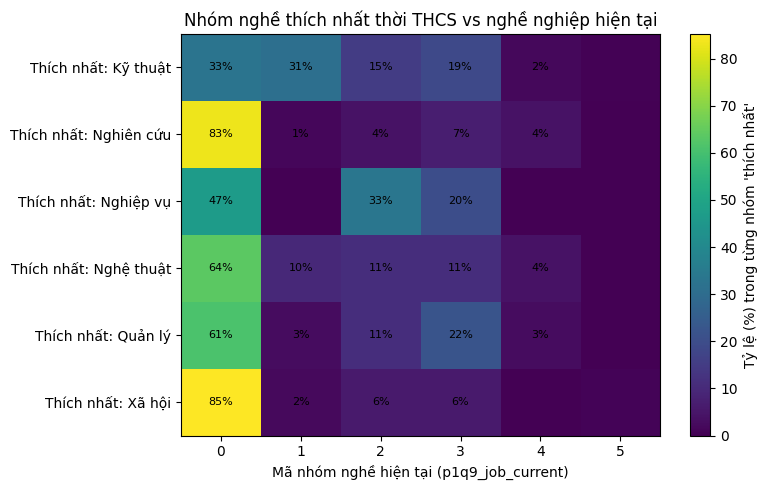

In [114]:


like_cols_list = ["q6_likeen", "q6_likere", "q6_likear",
                  "q6_likeso", "q6_likeman", "q6_likecle"]

group_names = {
    "q6_likeen":  "Thích nhất: Kỹ thuật",
    "q6_likere":  "Thích nhất: Nghiên cứu",
    "q6_likear":  "Thích nhất: Nghệ thuật",
    "q6_likeso":  "Thích nhất: Xã hội",
    "q6_likeman": "Thích nhất: Quản lý",
    "q6_likecle": "Thích nhất: Nghiệp vụ",
}

# 1) Tìm cột có điểm cao nhất (nếu nhiều cột bằng nhau, idxmax lấy cái đầu)
best_like_col = df[like_cols_list].idxmax(axis=1)
best_like_label = best_like_col.map(group_names)

# 2) Crosstab với nghề hiện tại (mã p1q9_job_current)
ct = pd.crosstab(best_like_label, df["p1q9_job_current"], normalize="index") * 100 # tính xác suất có điều kiện ( thích Y làm nghề X bao nhiêu phần trăm)

# 3) Vẽ heatmap đơn giản
fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(ct.values, aspect="auto")

ax.set_yticks(range(len(ct.index)))
ax.set_yticklabels(ct.index)

ax.set_xticks(range(len(ct.columns)))
ax.set_xticklabels(ct.columns)

for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        val = ct.values[i, j]
        if val > 1:
            ax.text(j, i, f"{val:.0f}%", ha="center", va="center", fontsize=8)

ax.set_xlabel("Mã nhóm nghề hiện tại (p1q9_job_current)")
ax.set_title("Nhóm nghề thích nhất thời THCS vs nghề nghiệp hiện tại")
plt.colorbar(im, label="Tỷ lệ (%) trong từng nhóm 'thích nhất'")
plt.tight_layout()
plt.show()


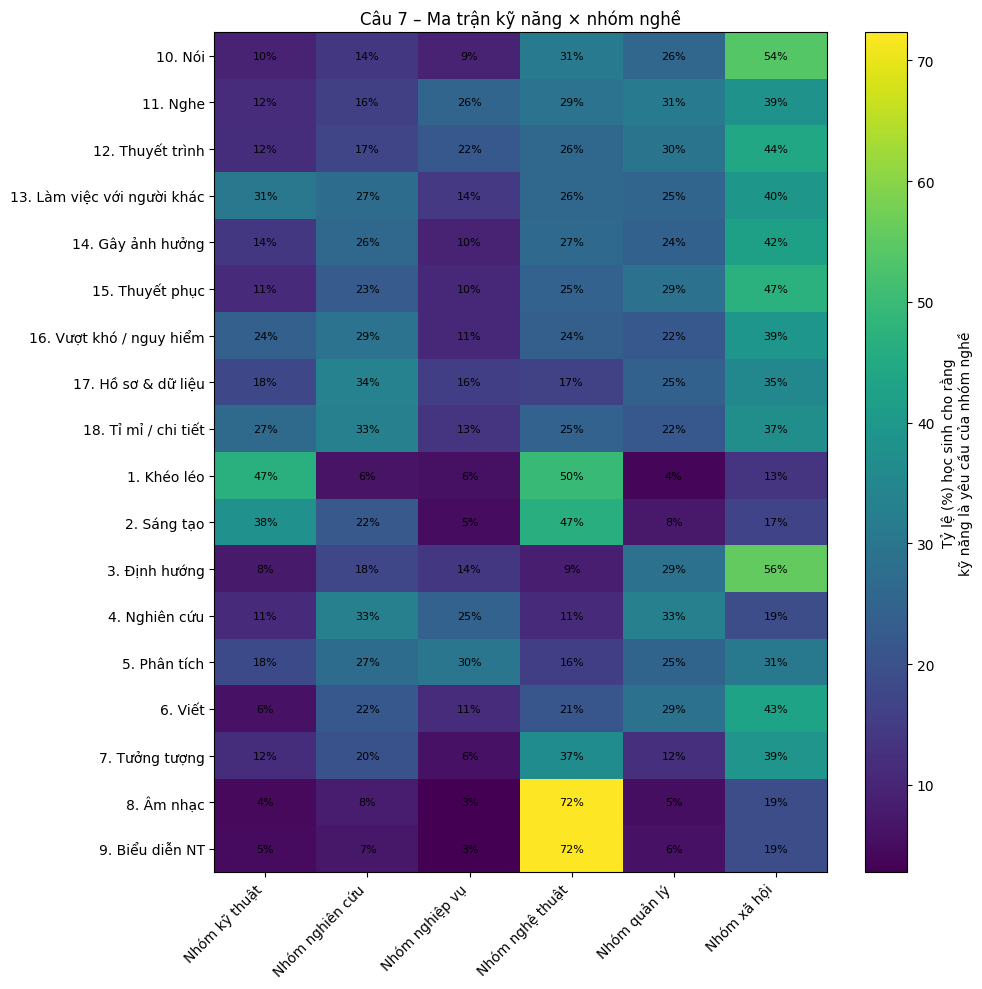

In [115]:
# 2. Lấy các cột requi (Câu 7 đã chuẩn hoá 0/1)
requi_cols = [c for c in df.columns if c.startswith("requi")]

# 3. Map mã nhóm nghề → tên tiếng Việt
group_map = {
    "kt": "Nhóm kỹ thuật",
    "nc": "Nhóm nghiên cứu",
    "nt": "Nhóm nghệ thuật",
    "xh": "Nhóm xã hội",
    "ql": "Nhóm quản lý",
    "nv": "Nhóm nghiệp vụ",
}

# 4. (optional) map tên kỹ năng cho đẹp
skill_label_map = {
    "requi1_kheo_leo": "1. Khéo léo",
    "requi2_sang_tao": "2. Sáng tạo",
    "requi3_dinh_huong": "3. Định hướng",
    "requi4_nghien_cuu": "4. Nghiên cứu",
    "requi5_phan_tich": "5. Phân tích",
    "requi6_viet": "6. Viết",
    "requi7_tuong_tuong": "7. Tưởng tượng",
    "requi8_am_nhac": "8. Âm nhạc",
    "requi9_bieu_dien_nghe_thuat": "9. Biểu diễn NT",
    "requi10_noi": "10. Nói",
    "requi11_nghe": "11. Nghe",
    "requi12_thuyet_trinh": "12. Thuyết trình",
    "requi13_lam_viec_voi_nguoi_khac": "13. Làm việc với người khác",
    "requi14_gay_anh_huong": "14. Gây ảnh hưởng",
    "requi15_thuyet_phuc": "15. Thuyết phục",
    "requi16_vuot_kho_khan_nguy_hiem": "16. Vượt khó / nguy hiểm",
    "requi17_lam_viec_voi_ho_so_du_lieu": "17. Hồ sơ & dữ liệu",
    "requi18_lam_viec_ti_mi_chi_tiet": "18. Tỉ mỉ / chi tiết",
}

# 5. Tính % cho từng (kỹ năng, nhóm nghề)
rows = []
for col in requi_cols:
    parts = col.split("_")
    group_code = parts[-1]                 # kt / nc / nt / xh / ql / nv
    skill_key = "_".join(parts[:-1])       # requi1_kheo_leo

    group_name = group_map.get(group_code, group_code)
    pct = df[col].mean() * 100             # % người tick = mean * 100

    rows.append([skill_key, group_name, pct])

heat_df = pd.DataFrame(rows, columns=["skill_key", "group_name", "pct"])

# 6. Pivot: hàng = kỹ năng, cột = nhóm nghề
heat_table = heat_df.pivot(
    index="skill_key",
    columns="group_name",
    values="pct"
).sort_index()

# Đổi tên hàng bằng label dễ đọc
heat_table.index = [skill_label_map.get(k, k) for k in heat_table.index]

# 7. Vẽ heatmap
fig, ax = plt.subplots(figsize=(10, 10))

im = ax.imshow(heat_table.values, aspect="auto")  # không set cmap → dùng mặc định

# tick & label
ax.set_xticks(range(len(heat_table.columns)))
ax.set_xticklabels(heat_table.columns, rotation=45, ha="right")

ax.set_yticks(range(len(heat_table.index)))
ax.set_yticklabels(heat_table.index)

# ghi % lên từng ô cho dễ đọc
for i in range(heat_table.shape[0]):
    for j in range(heat_table.shape[1]):
        val = heat_table.values[i, j]
        ax.text(j, i, f"{val:.0f}%", ha="center", va="center", fontsize=8)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Tỷ lệ (%) học sinh cho rằng\nkỹ năng là yêu cầu của nhóm nghề")

ax.set_title("Câu 7 – Ma trận kỹ năng × nhóm nghề")
plt.tight_layout()
plt.show()

In [116]:


# ====== HÀM VẼ LIKERT 100% STACKED HORIZONTAL ======

def plot_likert_group(df, cols, labels, title):
    """
    df     : DataFrame
    cols   : list tên cột (Likert 1–5)
    labels : list nhãn hiển thị cho từng câu (cùng thứ tự với cols)
    title  : tiêu đề biểu đồ
    """
    likert_order = [1, 2, 3, 4, 5]

    rows = []
    for col in cols:
        perc = (
            df[col]
            .value_counts(normalize=True)
            .reindex(likert_order, fill_value=0) * 100
        )
        rows.append(perc.values)

    likert_df = pd.DataFrame(rows, index=labels, columns=likert_order)

    fig, ax = plt.subplots(figsize=(10, len(labels) * 0.5))

    left = np.zeros(len(labels))
    for val in likert_order:
        ax.barh(likert_df.index, likert_df[val], left=left, label=f"Mức {val}")
        left += likert_df[val].values

    ax.set_xlabel("Tỷ lệ (%)")
    ax.set_xlim(0, 100)
    ax.set_title(title)

    ax.legend(title="Mức độ", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()




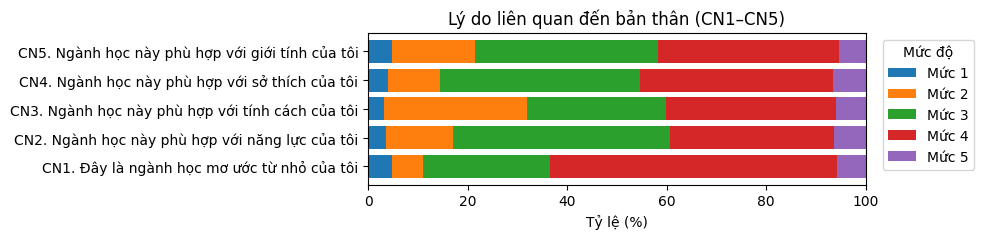

In [117]:
# ====== 1) NHÓM CÁ NHÂN – CN1–CN5 (q10_whycho1–5) ======

cn_cols = [f"q10_whycho{i}" for i in range(1, 6)]
cn_labels = [
    "CN1. Đây là ngành học mơ ước từ nhỏ của tôi",
    "CN2. Ngành học này phù hợp với năng lực của tôi",
    "CN3. Ngành học này phù hợp với tính cách của tôi",
    "CN4. Ngành học này phù hợp với sở thích của tôi",
    "CN5. Ngành học này phù hợp với giới tính của tôi",
]

plot_likert_group(df, cn_cols, cn_labels,
                  "Lý do liên quan đến bản thân (CN1–CN5)")

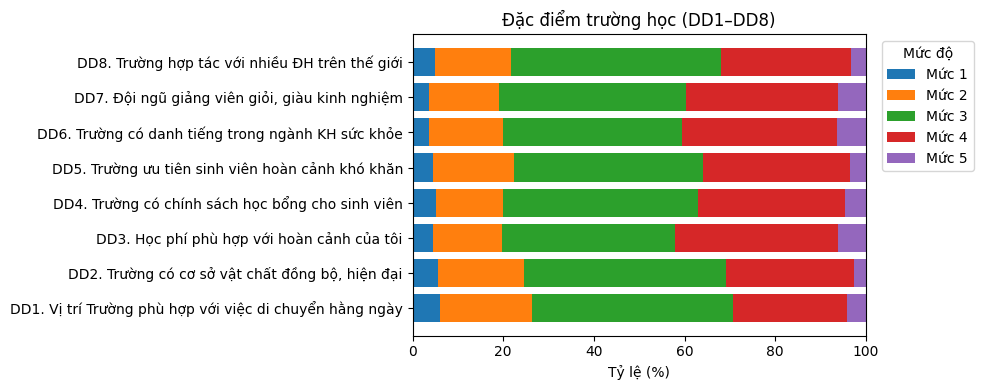

In [118]:

# ====== 2) NHÓM ĐẶC ĐIỂM TRƯỜNG – DD1–DD8 (q10_whycho6–13) ======

dd_cols = [f"q10_whycho{i}" for i in range(6, 14)]
dd_labels = [
    "DD1. Vị trí Trường phù hợp với việc di chuyển hằng ngày",
    "DD2. Trường có cơ sở vật chất đồng bộ, hiện đại",
    "DD3. Học phí phù hợp với hoàn cảnh của tôi",
    "DD4. Trường có chính sách học bổng cho sinh viên",
    "DD5. Trường ưu tiên sinh viên hoàn cảnh khó khăn",
    "DD6. Trường có danh tiếng trong ngành KH sức khỏe",
    "DD7. Đội ngũ giảng viên giỏi, giàu kinh nghiệm",
    "DD8. Trường hợp tác với nhiều ĐH trên thế giới",
]

plot_likert_group(df, dd_cols, dd_labels,
                  "Đặc điểm trường học (DD1–DD8)")

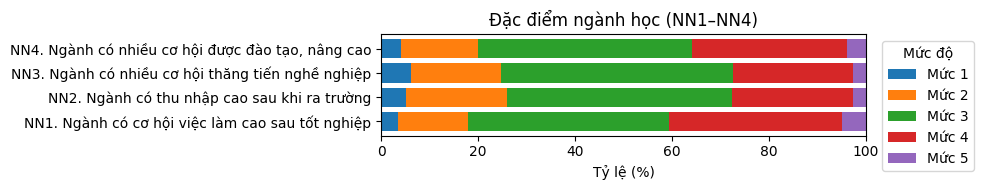

In [119]:

# ====== 3) NHÓM ĐẶC ĐIỂM NGÀNH – NN1–NN4 (q10_whycho14–17) ======

nn_cols = [f"q10_whycho{i}" for i in range(14, 18)]
nn_labels = [
    "NN1. Ngành có cơ hội việc làm cao sau tốt nghiệp",
    "NN2. Ngành có thu nhập cao sau khi ra trường",
    "NN3. Ngành có nhiều cơ hội thăng tiến nghề nghiệp",
    "NN4. Ngành có nhiều cơ hội được đào tạo, nâng cao",
]

plot_likert_group(df, nn_cols, nn_labels,
                  "Đặc điểm ngành học (NN1–NN4)")

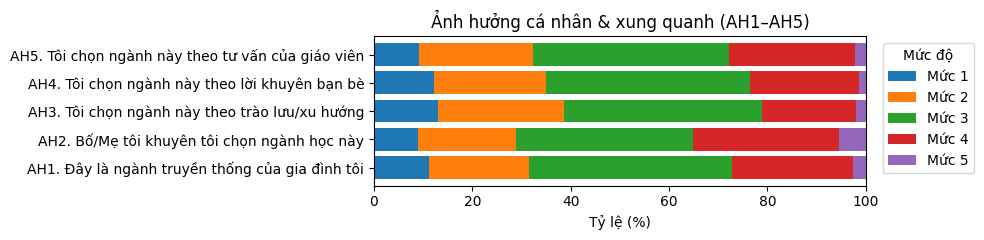

In [120]:
# ====== 4) NHÓM ẢNH HƯỞNG CÁ NHÂN / TRUYỀN THÔNG – AH1–AH5 (q10_whycho18–22) ======

ah_cols = [f"q10_whycho{i}" for i in range(18, 23)]
ah_labels = [
    "AH1. Đây là ngành truyền thống của gia đình tôi",
    "AH2. Bố/Mẹ tôi khuyên tôi chọn ngành học này",
    "AH3. Tôi chọn ngành này theo trào lưu/xu hướng",
    "AH4. Tôi chọn ngành này theo lời khuyên bạn bè",
    "AH5. Tôi chọn ngành này theo tư vấn của giáo viên",
]

plot_likert_group(df, ah_cols, ah_labels,
                  "Ảnh hưởng cá nhân & xung quanh (AH1–AH5)")

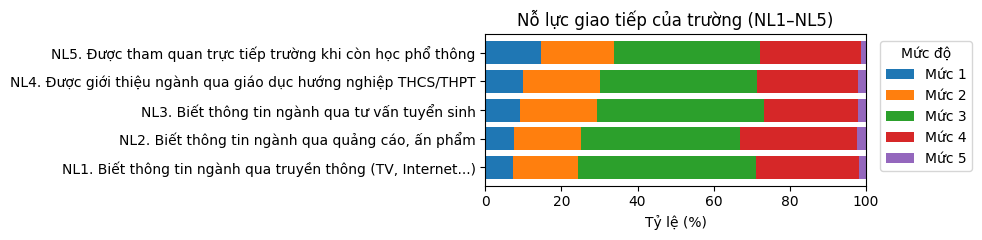

In [121]:

# ====== 5) NHÓM NỖ LỰC GIAO TIẾP CỦA TRƯỜNG – NL1–NL5 (q10_whycho23–27) ======

nl_cols = [f"q10_whycho{i}" for i in range(23, 28)]
nl_labels = [
    "NL1. Biết thông tin ngành qua truyền thông (TV, Internet...)",
    "NL2. Biết thông tin ngành qua quảng cáo, ấn phẩm",
    "NL3. Biết thông tin ngành qua tư vấn tuyển sinh",
    "NL4. Được giới thiệu ngành qua giáo dục hướng nghiệp THCS/THPT",
    "NL5. Được tham quan trực tiếp trường khi còn học phổ thông",
]

plot_likert_group(df, nl_cols, nl_labels,
                  "Nỗ lực giao tiếp của trường (NL1–NL5)")

# Trạng thái hiện tại của người tham gia khảo sát


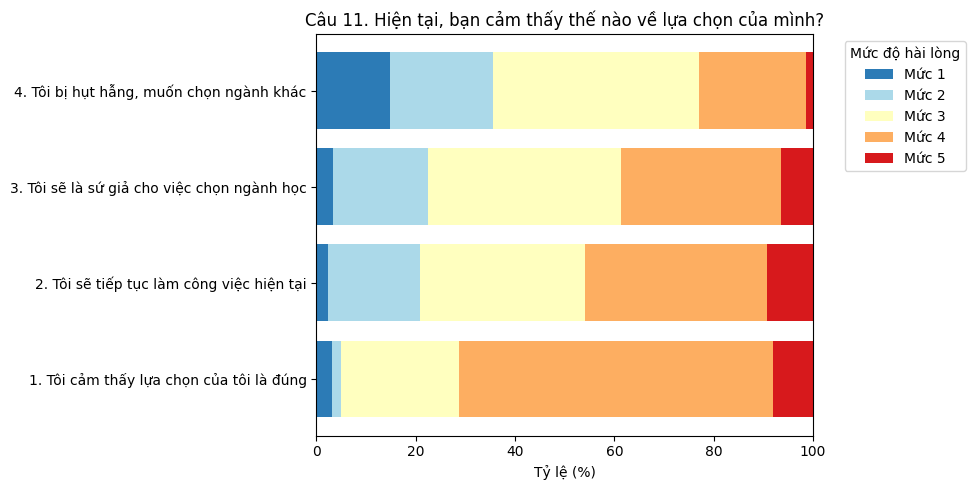

In [122]:
likert_cols = ['q11_curfeel1', 'q11_curfeel2', 'q11_curfeel3', 'q11_curfeel4']

# Đặt nhãn rõ nghĩa theo đúng câu hỏi
labels = [
    "1. Tôi cảm thấy lựa chọn của tôi là đúng",
    "2. Tôi sẽ tiếp tục làm công việc hiện tại",
    "3. Tôi sẽ là sứ giả cho việc chọn ngành học",
    "4. Tôi bị hụt hẫng, muốn chọn ngành khác"
]

# Thứ tự mức độ Likert
likert_order = [1, 2, 3, 4, 5]

# Tính % cho từng mức độ
rows = []
for col in likert_cols:
    perc = (
        df[col]
        .value_counts(normalize=True)
        .reindex(likert_order, fill_value=0) * 100
    )
    rows.append(perc.values)

likert_df = pd.DataFrame(rows, index=labels, columns=likert_order)

# Vẽ stacked bar 100%
fig, ax = plt.subplots(figsize=(10, 5))

left = np.zeros(len(labels))

colors = ["#2c7bb6", "#abd9e9", "#ffffbf", "#fdae61", "#d7191c"]  # xanh→đỏ theo mức độ

for i, val in enumerate(likert_order):
    ax.barh(labels, likert_df[val], left=left, label=f"Mức {val}", color=colors[i])
    left += likert_df[val].values

ax.set_xlabel("Tỷ lệ (%)")
ax.set_xlim(0, 100)
ax.set_title("Câu 11. Hiện tại, bạn cảm thấy thế nào về lựa chọn của mình?")

# legend
ax.legend(title="Mức độ hài lòng", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

# Trực quan một số thông tin về đối tưởng thấy hụt hẫng


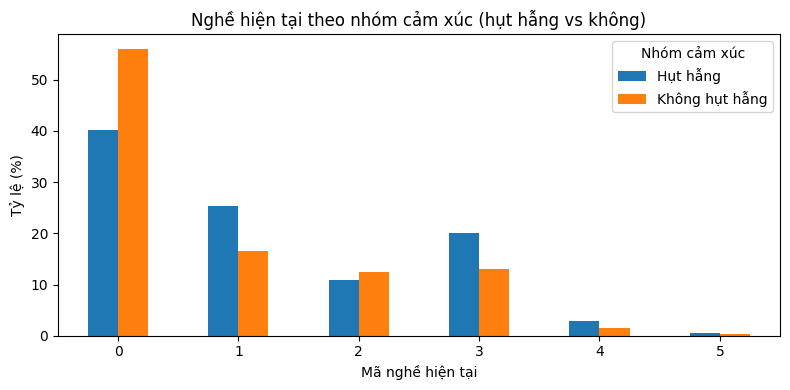

In [123]:


# Tạo biến nhóm
df['regret_group'] = np.where(df['q11_curfeel4'] >= 4,
                              'Hụt hẫng',
                              'Không hụt hẫng')
job_ct = (
    df
    .groupby('regret_group')['p1q9_job_current']
    .value_counts(normalize=True)
    .mul(100)
    .rename('pct')
    .reset_index()
)

pivot = job_ct.pivot(index='p1q9_job_current',
                     columns='regret_group',
                     values='pct').fillna(0)

pivot.plot(kind='bar', figsize=(8,4))
plt.ylabel("Tỷ lệ (%)")
plt.xlabel("Mã nghề hiện tại")
plt.title("Nghề hiện tại theo nhóm cảm xúc (hụt hẫng vs không)")
plt.xticks(rotation=0)
plt.legend(title="Nhóm cảm xúc")
plt.tight_layout()
plt.show()


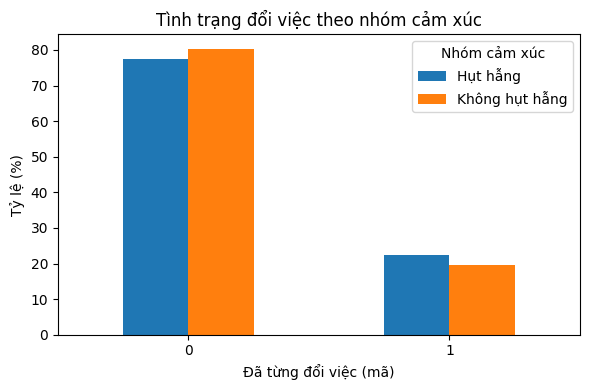

In [124]:
chan_ct = (
    df
    .groupby('regret_group')['p1q10_chanjob']
    .value_counts(normalize=True)
    .mul(100)
    .rename('pct')
    .reset_index()
)

pivot = chan_ct.pivot(index='p1q10_chanjob',
                      columns='regret_group',
                      values='pct').fillna(0)

pivot.plot(kind='bar', figsize=(6,4))
plt.ylabel("Tỷ lệ (%)")
plt.xlabel("Đã từng đổi việc (mã)")
plt.title("Tình trạng đổi việc theo nhóm cảm xúc")
plt.xticks(rotation=0)
plt.legend(title="Nhóm cảm xúc")
plt.tight_layout()
plt.show()


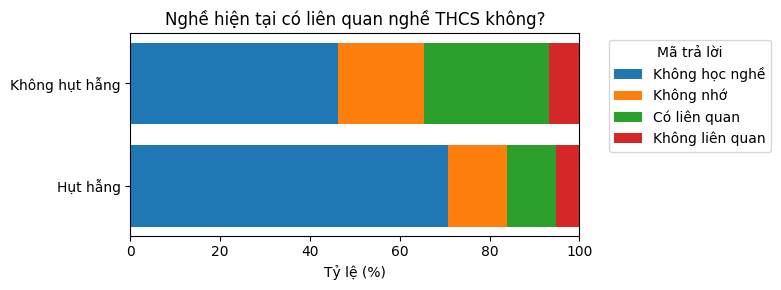

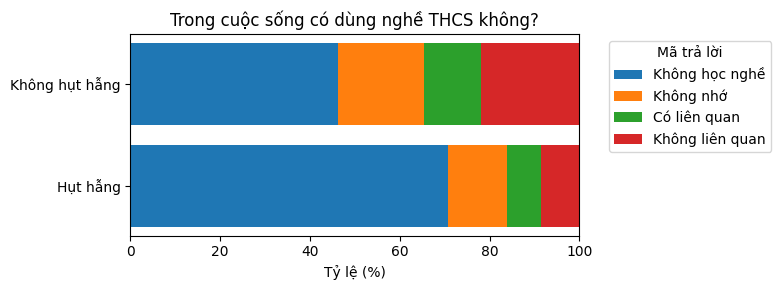

In [125]:
code_labels = {
    -1: "Không học nghề",
    -2: "Không nhớ",
     0: "Có liên quan",
     1: "Không liên quan"
}

def likert_100_bar(df, col, group_col, title):
    temp = (
        df
        .groupby(group_col)[col]
        .value_counts(normalize=True)
        .mul(100)
        .rename('pct')
        .reset_index()
    )
    temp[col] = temp[col].map(code_labels)
    pivot = temp.pivot(index=group_col, columns=col, values='pct').fillna(0)

    pivot = pivot[code_labels.values()]  # đảm bảo đúng thứ tự

    fig, ax = plt.subplots(figsize=(8,3))
    left = np.zeros(len(pivot))

    for label in pivot.columns:
        ax.barh(pivot.index, pivot[label], left=left, label=label)
        left += pivot[label].values

    ax.set_xlabel("Tỷ lệ (%)")
    ax.set_xlim(0, 100)
    ax.set_title(title)
    ax.legend(title="Mã trả lời", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Liên quan nghề THCS với nghề hiện tại
likert_100_bar(df, 'q1d_recurjob', 'regret_group',
               "Nghề hiện tại có liên quan nghề THCS không?")

# Dùng nghề THCS trong cuộc sống
likert_100_bar(df, 'q1e_lifeuse', 'regret_group',
               "Trong cuộc sống có dùng nghề THCS không?")


<Figure size 600x400 with 0 Axes>

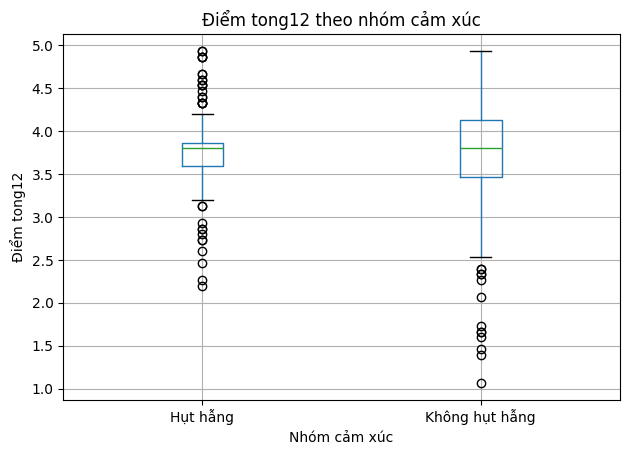

In [126]:
plt.figure(figsize=(6,4))
df.boxplot(column='tong12', by='regret_group')
plt.title("Điểm tong12 theo nhóm cảm xúc")
plt.suptitle("")
plt.xlabel("Nhóm cảm xúc")
plt.ylabel("Điểm tong12")
plt.tight_layout()
plt.show()


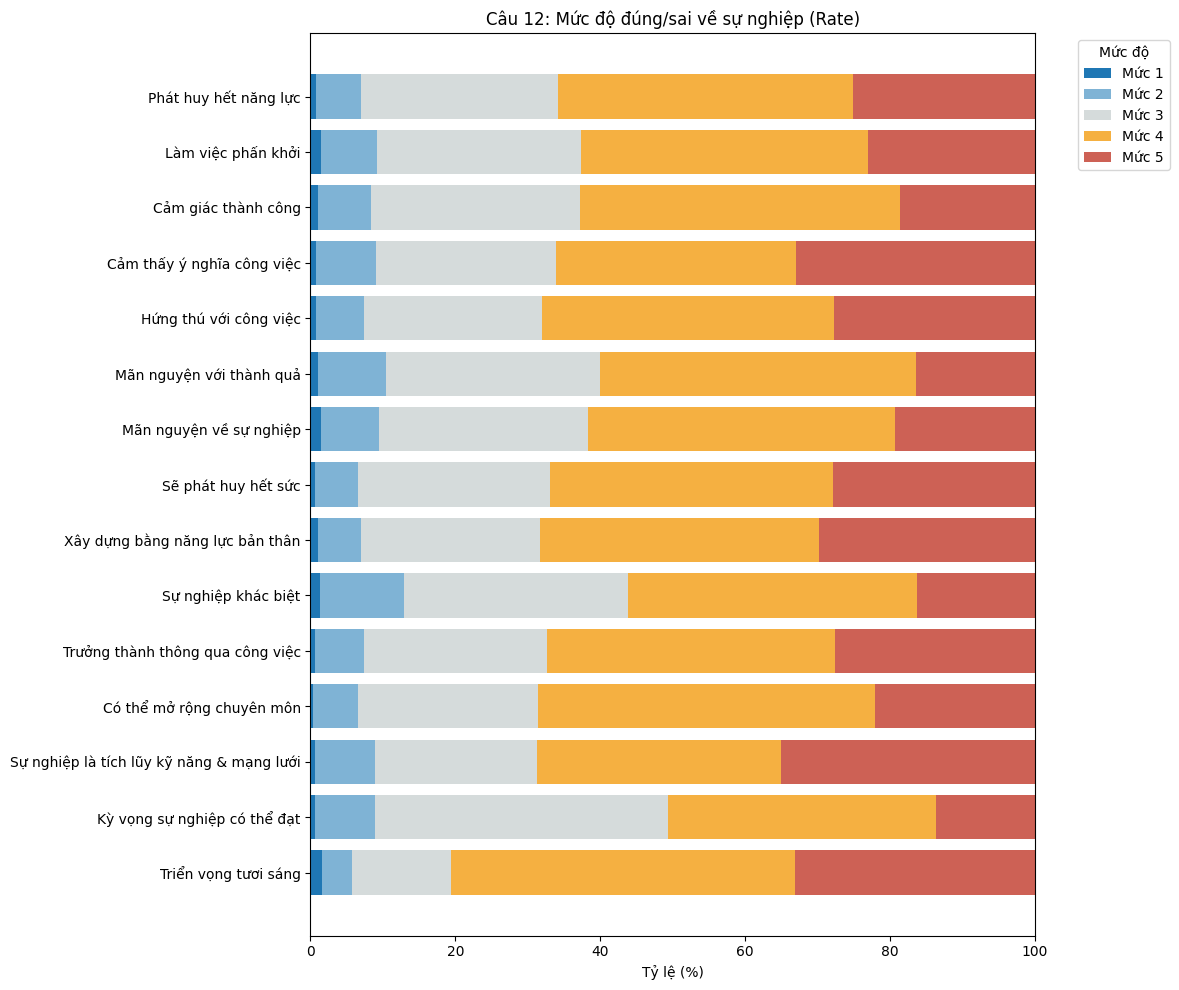

In [127]:


# Câu 12 gồm 15 câu
rate_cols = [f"q12_rate{i}" for i in range(1, 16)]

# Nhãn hiển thị
labels = [
    "Triển vọng tươi sáng", 
    "Kỳ vọng sự nghiệp có thể đạt",
    "Sự nghiệp là tích lũy kỹ năng & mạng lưới",
    "Có thể mở rộng chuyên môn",
    "Trưởng thành thông qua công việc",
    "Sự nghiệp khác biệt",
    "Xây dựng bằng năng lực bản thân",
    "Sẽ phát huy hết sức",
    "Mãn nguyện về sự nghiệp",
    "Mãn nguyện với thành quả",
    "Hứng thú với công việc",
    "Cảm thấy ý nghĩa công việc",
    "Cảm giác thành công",
    "Làm việc phấn khởi",
    "Phát huy hết năng lực"
]

likert_order = [1,2,3,4,5]

# Tính tỷ lệ phần trăm
rows = []
for col in rate_cols:
    perc = df[col].value_counts(normalize=True).reindex(likert_order, fill_value=0) * 100
    rows.append(perc.values)

likert_df = pd.DataFrame(rows, index=labels, columns=likert_order)

# Vẽ stacked horizontal bar
fig, ax = plt.subplots(figsize=(12, 10))

left = np.zeros(len(labels))
colors = ["#1f77b4", "#7fb3d5", "#d5dbdb", "#f5b041", "#cd6155"]

for i, level in enumerate(likert_order):
    ax.barh(labels, likert_df[level], left=left, label=f"Mức {level}", color=colors[i])
    left += likert_df[level].values

ax.set_xlabel("Tỷ lệ (%)")
ax.set_xlim(0, 100)
ax.set_title("Câu 12: Mức độ đúng/sai về sự nghiệp (Rate)")

ax.legend(title="Mức độ", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


# Xử lý thêm

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Columns: 252 entries, tong12 to regret_group
dtypes: float64(25), int32(2), int64(206), object(19)
memory usage: 1.5+ MB


In [129]:
df= df.drop(columns=skill_cols)

In [130]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Columns: 234 entries, tong12 to regret_group
dtypes: float64(25), int32(2), int64(206), object(1)
memory usage: 1.3+ MB


In [135]:
object = df.select_dtypes(include="object").columns
object

Index([], dtype='object')

In [133]:
mapping_dict = {
    'Không hụt hẫng': 0,
    'Hụt hẫng': 1
}

df['regret_group'] = df['regret_group'].map(mapping_dict)

In [134]:
df['regret_group']

0      0
1      0
2      0
3      1
4      1
      ..
754    0
755    0
756    1
757    0
758    0
Name: regret_group, Length: 759, dtype: int64

# Mức độ biết về yêu cầu kỹ năng

In [ ]:
df.to_csv('Dataset_Phieu_final.csv')

In [3]:
df = pd.read_csv('Dataset_Phieu_final.csv')

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Columns: 235 entries, Unnamed: 0 to regret_group
dtypes: float64(25), int64(210)
memory usage: 1.4 MB


In [7]:
# 2. Lấy các cột requi (Câu 7 đã chuẩn hoá 0/1)
requi_cols = [c for c in df.columns if c.startswith("requi")]
requi_cols[0:20]

108

In [15]:

ANSWER_KEY = {
    "ky_thuat": [
        "requi1_kheo_leo_kt",
        "requi2_sang_tao_kt",
    ],
    "nghien_cuu": [
        "requi3_dinh_huong_nc",
        "requi4_nghien_cuu_nc",
        "requi5_phan_tich_nc",
        "requi6_viet_nc",
    ],
    "nghe_thuat": [
        "requi7_tuong_tuong_nt",
        "requi8_am_nhac_nt",
        "requi9_bieu_dien_nghe_thuat_nt",
    ],
    "xa_hoi": [
        "requi10_noi_xh",
        "requi11_nghe_xh",
        "requi12_thuyet_trinh_xh",
        "requi13_lam_viec_voi_nguoi_khac_xh",
    ],
    "quan_ly": [
        "requi14_gay_anh_huong_ql",
        "requi15_thuyet_phuc_ql",
        "requi16_vuot_kho_khan_nguy_hiem_ql",
    ],
    "nghiep_vu": [
        "requi17_lam_viec_voi_ho_so_du_lieu_nv",
        "requi18_lam_viec_ti_mi_chi_tiet_nv",
    ],
}

# CHỐT: đúng 5 cột => mặc định bỏ "nghiep_vu"
GROUPS = ["ky_thuat", "nghien_cuu", "nghe_thuat", "xa_hoi", "quan_ly","nghiep_vu"]
# Nếu bạn muốn 6 cột: GROUPS = ["ky_thuat","nghien_cuu","nghe_thuat","xa_hoi","quan_ly","nghiep_vu"]

EPS = 1e-9

def add_awareness_levels_quantile(df: pd.DataFrame) -> pd.DataFrame:
    # Sanity: requi* phải là 0/1
    # (nếu có float/bool vẫn OK; nếu có giá trị khác 0/1 bạn nên chuẩn hóa trước)
    for g in GROUPS:
        cols = ANSWER_KEY[g]
        missing = [c for c in cols if c not in df.columns]
        if missing:
            raise ValueError(f"Missing columns for group '{g}': {missing}")

        # score = tỉ lệ tick đúng trên các item của nhóm
        score = df[cols].sum(axis=1) / (len(cols) + EPS)

        # quantile split
        q1 = score.quantile(1/3)
        q2 = score.quantile(2/3)

        # Low=1, Medium=2, High=3
        df[f"aware_lv_{g}"] = np.select(
            [score < q1, score < q2],
            [1, 2],
            default=3
        ).astype(int)

    return df

df = add_awareness_levels_quantile(df)


In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Columns: 241 entries, Unnamed: 0 to aware_lv_nghiep_vu
dtypes: float64(25), int32(6), int64(210)
memory usage: 1.4 MB


In [23]:
AWARE_COLS = [
    "aware_lv_ky_thuat",
    "aware_lv_nghien_cuu",
    "aware_lv_nghe_thuat",
    "aware_lv_xa_hoi",
    "aware_lv_quan_ly",
     "aware_lv_nghiep_vu"
]

df[AWARE_COLS].head(10)


,aware_lv_ky_thuat,aware_lv_nghien_cuu,aware_lv_nghe_thuat,aware_lv_xa_hoi,aware_lv_quan_ly,aware_lv_nghiep_vu
0,3,3,3,3,3,3
1,3,3,3,3,3,3
2,1,2,1,1,3,3
3,3,3,3,3,2,3
4,3,3,3,3,3,3
5,3,2,3,3,2,3
6,3,3,3,3,2,3
7,3,3,3,3,3,3
8,3,3,3,3,3,3
9,3,3,3,1,2,3


In [24]:
# phân bố
for c in AWARE_COLS:
    print(f"\n{c}")
    print(df[c].value_counts().sort_index())



aware_lv_ky_thuat
aware_lv_ky_thuat
1    179
3    580
Name: count, dtype: int64

aware_lv_nghien_cuu
aware_lv_nghien_cuu
2    364
3    395
Name: count, dtype: int64

aware_lv_nghe_thuat
aware_lv_nghe_thuat
1    243
3    516
Name: count, dtype: int64

aware_lv_xa_hoi
aware_lv_xa_hoi
1    151
2    293
3    315
Name: count, dtype: int64

aware_lv_quan_ly
aware_lv_quan_ly
2    397
3    362
Name: count, dtype: int64

aware_lv_nghiep_vu
aware_lv_nghiep_vu
3    759
Name: count, dtype: int64


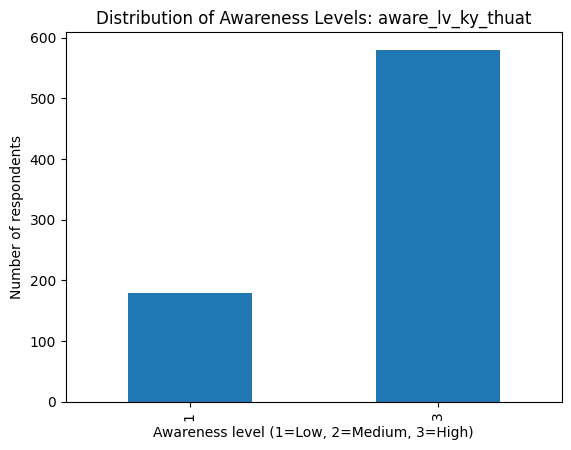

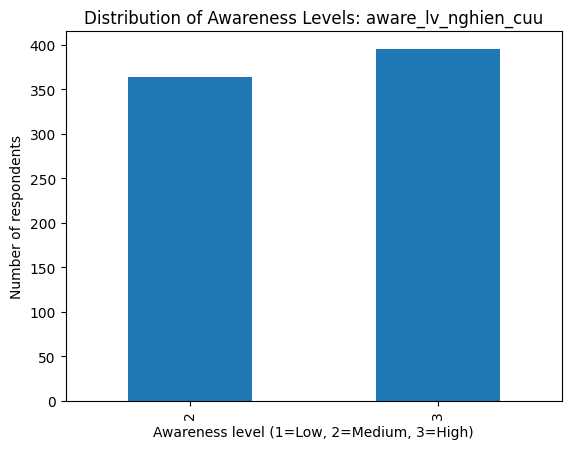

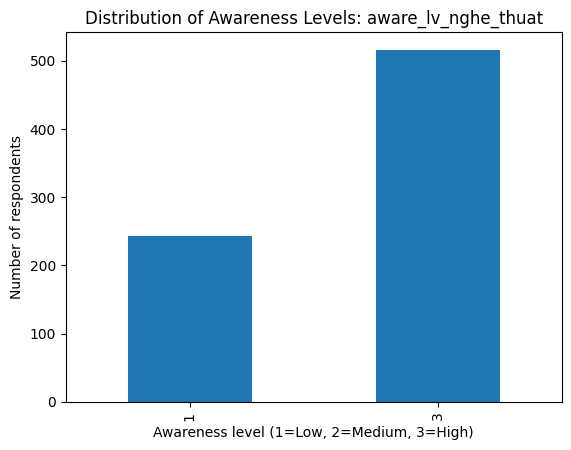

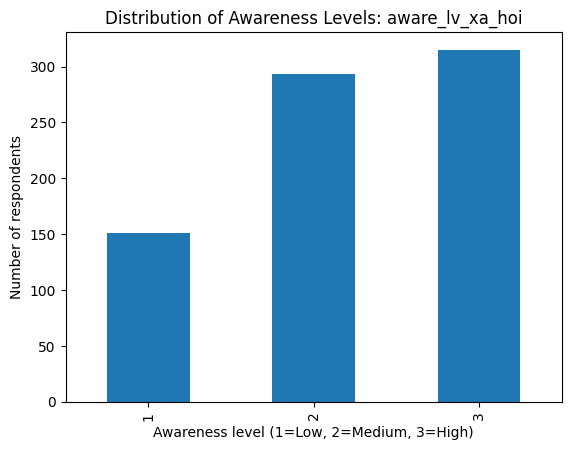

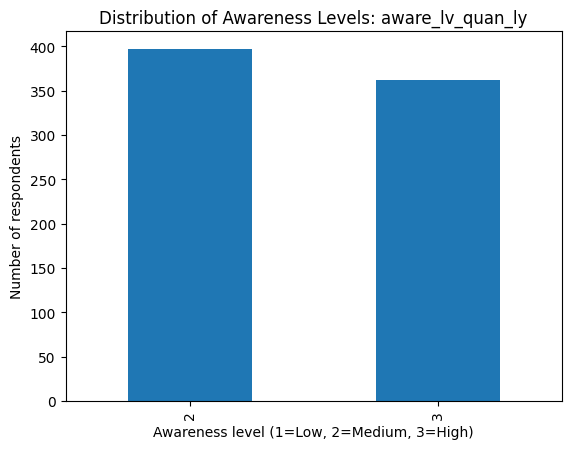

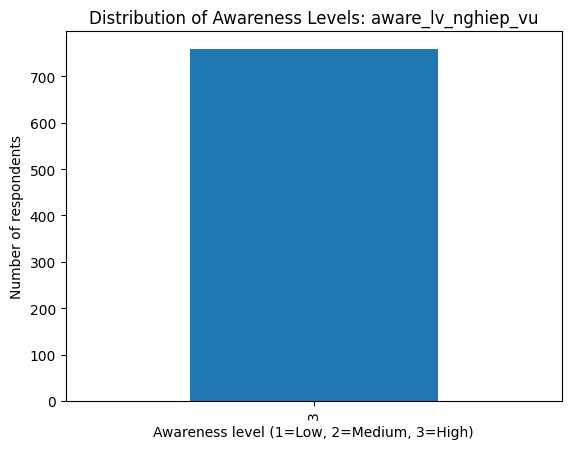

In [25]:

for col in AWARE_COLS:
    counts = df[col].value_counts().sort_index()

    plt.figure()
    counts.plot(kind="bar")
    plt.title(f"Distribution of Awareness Levels: {col}")
    plt.xlabel("Awareness level (1=Low, 2=Medium, 3=High)")
    plt.ylabel("Number of respondents")
    plt.show()

In [29]:
profile = (
    df.groupby("p1q9_job_current")[AWARE_COLS]
      .mean()
)



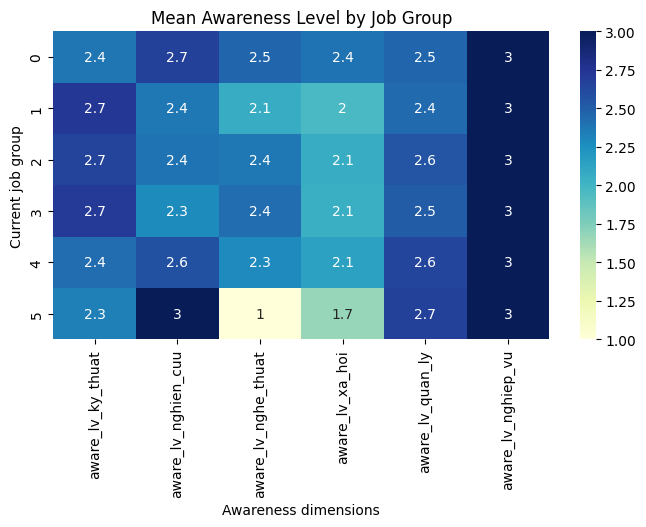

In [30]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(profile, annot=True, cmap="YlGnBu", vmin=1, vmax=3)
plt.title("Mean Awareness Level by Job Group")
plt.xlabel("Awareness dimensions")
plt.ylabel("Current job group")
plt.show()


In [31]:
df.to_csv('Dataset_Phieu_final.csv')
